# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Michelle Christabel Fidelia Siswanto]
- **Email:** [michelle.christabel9@gmail.com]
- **ID Dicoding:** [michellechristabel]

# Menentukan Pertanyaan Bisnis

1.  Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
2.  Apa saja jenis pengguna sewa sepeda setiap harinya?
3. Bagaimana performa dari penjualan perusahaan dalam beberapa tahun terakhir?







## Import Semua Packages/Library yang Digunakan

In [ ]:
# Memanggil semua library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import files
uploaded = files.upload()

day_df = pd.read_csv("day.csv")
day_df.head()

Saving day.csv to day (1).csv


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
from google.colab import files
uploaded = files.upload()

hour_df = pd.read_csv("hour.csv")
hour_df.head()

Saving hour.csv to hour (2).csv


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insight:


*   Pada data day_df dan hour_df tidak ada missing value di dalamnya. akan tetapi, terdapat kesalahan tipe data untuk kolom dteday, kolom tersebut seharusnya merepresentasikan sebagai tipe data datetime bukan object






### Cleaning Data

In [ ]:
# Menghapus kolom workingday
day_df.drop(['workingday'], axis=1, inplace=True)
hour_df.drop(['workingday'], axis=1, inplace=True)

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null

In [ ]:
# Mengganti tipe data dteday dari "object" menjadi "datetime"
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   dteday             731 non-null    datetime64[ns]
 2   season             731 non-null    object        
 3   year               731 non-null    object        
 4   month              731 non-null    object        
 5   holiday            731 non-null    object        
 6   one_of_week        731 non-null    object        
 7   weather_situation  731 non-null    object        
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  humidity           731 non-null    float64       
 11  wind_speed         731 non-null    float64       
 12  casual             731 non-null    int64         
 13  registered         731 non-null    int64         
 14  count_rent

Mengganti nama dan konversi isi kolom day_df

In [ ]:
# Mengganti nama kolom di dataset day_df
day_df.rename(columns={'yr':'year', 'mnth':'month', 'weekday':'one_of_week', 'weathersit':'weather_situation', 'hum':'humidity', 'windspeed':'wind_speed', 'cnt':'count_rental'}, inplace=True)

In [ ]:
# Konversi kolom season menjadi: 1:Spring, 2:Summer, 3:Autumn, 4:Winter
day_df['season'].replace({1:'Spring', 2:'Summer', 3:'Autumn', 4:'Winter'}, inplace=True)

# Konversi month menjadi 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

# Konversi weather_situation menjadi 1:Clear, 2:Cloudy, 3:Light_rain, 4:Heavy_rain
day_df['weather_situation'].replace({1:'Clear', 2:'Cloudy', 3:'Light_rain', 4:'Heavy_rain'}, inplace=True)

# Konversi one_of_week menjadi : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df['one_of_week'].replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}, inplace=True)

# Konversi year menjadi: 0:2011, 1:2012
day_df['year'].replace({0:'2011', 1:'2012'}, inplace=True)

# Konversi holiday menjadi 0:Yes, 1:No -> Yes = non-libur, No = libur
day_df['holiday'].replace({0:'Yes', 1:'No'}, inplace=True)

day_df.head()

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_rental
0,1,2011-01-01,Spring,2011,Jan,Yes,Sat,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,Yes,Sun,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,Yes,Mon,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,Yes,Tue,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,Yes,Wed,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengganti nama dan konversi isi kolom hour_df

In [ ]:
# Mengganti nama kolom di dataset hour_df
hour_df.rename(columns={'yr':'year', 'mnth':'month', 'hr':'hours', 'weekday':'one_of_week', 'weathersit':'weather_situation', 'hum':'humidity', 'windspeed':'wind_speed', 'cnt':'count_rental'}, inplace=True)

In [ ]:
# Konversi kolom season menjadi: 1:Spring, 2:Summer, 3:Autumn, 4:Winter
hour_df['season'].replace({1:'Spring', 2:'Summer', 3:'Autumn', 4:'Winter'}, inplace=True)

# Konversi month menjadi 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hour_df['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

# Konversi weather_situation menjadi 1:Clear, 2:Cloudy, 3:Light_rain, 4:Heavy_rain
hour_df['weather_situation'].replace({1:'Clear', 2:'Cloudy', 3:'Light_rain', 4:'Heavy_rain'}, inplace=True)

# Konversi one_of_week menjadi : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
hour_df['one_of_week'].replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}, inplace=True)

# Konversi year menjadi: 0:2011, 1:2012
hour_df['year'].replace({0:'2011', 1:'2012'}, inplace=True)

# Konversi holiday menjadi 0:Yes, 1:No -> Yes = non-libur, No = libur
hour_df['holiday'].replace({0:'Yes', 1:'No'}, inplace=True)

hour_df.head()

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_rental
0,1,2011-01-01,Spring,2011,Jan,0,Yes,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,Yes,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,Yes,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,Yes,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,Yes,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


Insight:


*   Menghapus kolom workday dikarenakan kolom tersebut sudah sama seperti weekday
*   Mengubah tipe data dteday dari "object" menjadi "datetime
* Mengganti nama kolom dan konversi isi kolom


## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [ ]:
# Melihat rangkuman parameter statistik dari dataset day_df
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_rental
count,731.000000,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Autumn,2012,Jan,Yes,Sat,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan rangkuman parameter statistik terdapat 731 pelanggan yang melakukan penyewaan sepeda dan sering terjadi di musim gugur

In [ ]:
# Jumlah penyewaan tiap musim
day_df.groupby(by='season').agg({
    "casual": "sum",
    "registered": "sum",
    "count_rental": ["max", "min", "mean", "sum"]
})

casual registered count_rental                            
           sum        sum          max   min         mean      sum
season                                                            
Autumn  226091     835038         8714  1115  5644.303191  1061129
Spring   60622     410726         7836   431  2604.132597   471348
Summer  203522     715067         8362   795  4992.331522   918589
Winter  129782     711831         8555    22  4728.162921   841613

Berdasarkan hasil tersebut, jumlah penyewaan sepeda terjadi di musim gugur dengan rata-rata pelanggan sebanyak 5644.303 orang

In [ ]:
# jumlah penyewaan tiap tahun berdasarkan registered dan casual
day_df.groupby(by=["year", "month"]).agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "count_rental": ["max", "min", "mean", "sum"]
})

dteday casual registered count_rental                           
           nunique    sum        sum          max   min         mean     sum
year month                                                                  
2011 Apr        30  22346      72524         5312   795  3162.333333   94870
     Aug        31  28842     107849         5895  1115  4409.387097  136691
     Dec        31   8448      78875         3940   705  2816.870968   87323
     Feb        28   6242      41973         2927  1005  1721.964286   48215
     Jan        31   3073      35116         1985   431  1231.903226   38189
     Jul        31  36452     104889         6043  3285  4559.387097  141341
     Jun        30  30612     112900         5515  3767  4783.733333  143512
     Mar        31  12826      51219         3239   605  2065.967742   64045
     May        31  31050     104771         5805  2633  4381.322581  135821
     Nov        30  15594      86573         4486  1495  3405.566667  102167
     Oct        31  25222      98289         5511   627  3984.225806  123511
     Sep        30  26545     100873         5423  1842  4247.266667  127418
2012 Apr        30  38456     135768         7460  1027  5807.466667  174224
     Aug        31  43197     171306         7865  4549  6919.451613  214503
     Dec        31  13245     110468         6606   441  3990.741935  123713
     Feb        29   8721      94416         5062  1529  3556.448276  103137
     Jan        31   8969      87775         4521  1301  3120.774194   96744
     Jul        31  41705     161902         8173  4459  6567.967742  203607
     Jun        30  43294     159536         8120  4127  6761.000000  202830
     Mar        31  31618     133257         8362  3194  5318.548387  164875
     May        31  44235     151630         8294  2843  6318.225806  195865
     Nov        30  21009     131655         6852  2277  5088.800000  152664
     Oct        31  34538     164303         8156    22  6414.225806  198841
     Sep        30  43778     174795         8714  4073  7285.766667  218573

Berdasarkan hasil diatas, di tahun 2011 pengguna sewa sepeda terbanyak ada di bulan Juni dengan total 143.512 pengguna. Di tahun 2012, pengguna sewa sepeda terbanyak ada di bulan September dengan total 218.573

In [ ]:
# rata-rata dan jumlah penyewaan sepeda berdasarkan kondisi cuaca
day_df.groupby(by="weather_situation").agg({
    "casual": "sum",
    "registered": "sum",
    "count_rental": ["max", "min", "mean", "sum"]
})

casual registered count_rental                           
                      sum        sum          max  min         mean      sum
weather_situation                                                           
Clear              446346    1811606         8714  431  4876.786177  2257952
Cloudy             169776     827082         8362  605  4035.862348   996858
Light_rain           3895      33974         4639   22  1803.285714    37869

Berdasarkan hasil diatas, penyewaan sepeda terjadi saat cuaca cerah/clear dengan rata-rata tertinggi sebesar 4876,78 dan total pengguna sebanyak 2.257.952 orang

### Explore Data hour_df

In [ ]:
# Melihat rangkuman parameter statistik dari dataset day_df
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Autumn,2012,May,NaN,Yes,Sat,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan dari rangkuman parameter statistik diatas, diperoleh jumlah pelanggan sebanyak 17.379 orang. Berdasarkan data tersebut, jangka waktu antara 00.00 sampai 23.00 memiliki rata-rata penyewaan sepeda terjadi pada jam 11.54 dengan standar deviasinya sebesar 6.91.

In [ ]:
# jumlah pengguna sewa sepeda berdasarkan jamnya
hour_df.groupby(by='hours').agg({
    "casual": "sum",
    "registered": "sum",
    "count_rental": ["max", "min", "mean", "sum"]
})

casual registered count_rental                        
         sum        sum          max min        mean     sum
hours                                                       
0       7375      31755          283   2   53.898072   39130
1       4709      19455          168   1   33.375691   24164
2       3412      12940          132   1   22.869930   16352
3       1893       6281           79   1   11.727403    8174
4        874       3554           28   1    6.352941    4428
5       1012      13249           66   1   19.889819   14261
6       3017      52115          213   1   76.044138   55132
7       8037     146134          596   1  212.064649  154171
8      15761     245240          839   5  359.011004  261001
9      22458     136980          426  14  219.309491  159438
10     33789      92468          539   8  173.668501  126257
11     43286     108034          663  10  208.143054  151320
12     49718     134696          776   3  253.315934  184414
13     52713     132206          760  11  253.661180  184919
14     55089     120563          750  12  240.949246  175652
15     54606     128543          750   7  251.233196  183149
16     53834     173914          783  11  311.983562  227748
17     54220     282640          976  15  461.452055  336860
18     44496     265276          977  23  425.510989  309772
19     35505     191284          743  11  311.523352  226789
20     26378     138172          567  11  226.030220  164550
21     20570     104875          584   6  172.314560  125445
22     16200      79412          502   9  131.335165   95612
23     11065      52876          256   2   87.831044   63941

Berdasarkan hasil tersebut, jumlah penyewaan sepeda terbanyak terjadi pada jam 17.00 sebanyak 336.860 pengguna dan penyewaan sepeda paling sedikit terjadi pada jam 04.00 sebanyak 4.428 pengguna

## Visualization & Explanatory Analysis

### Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

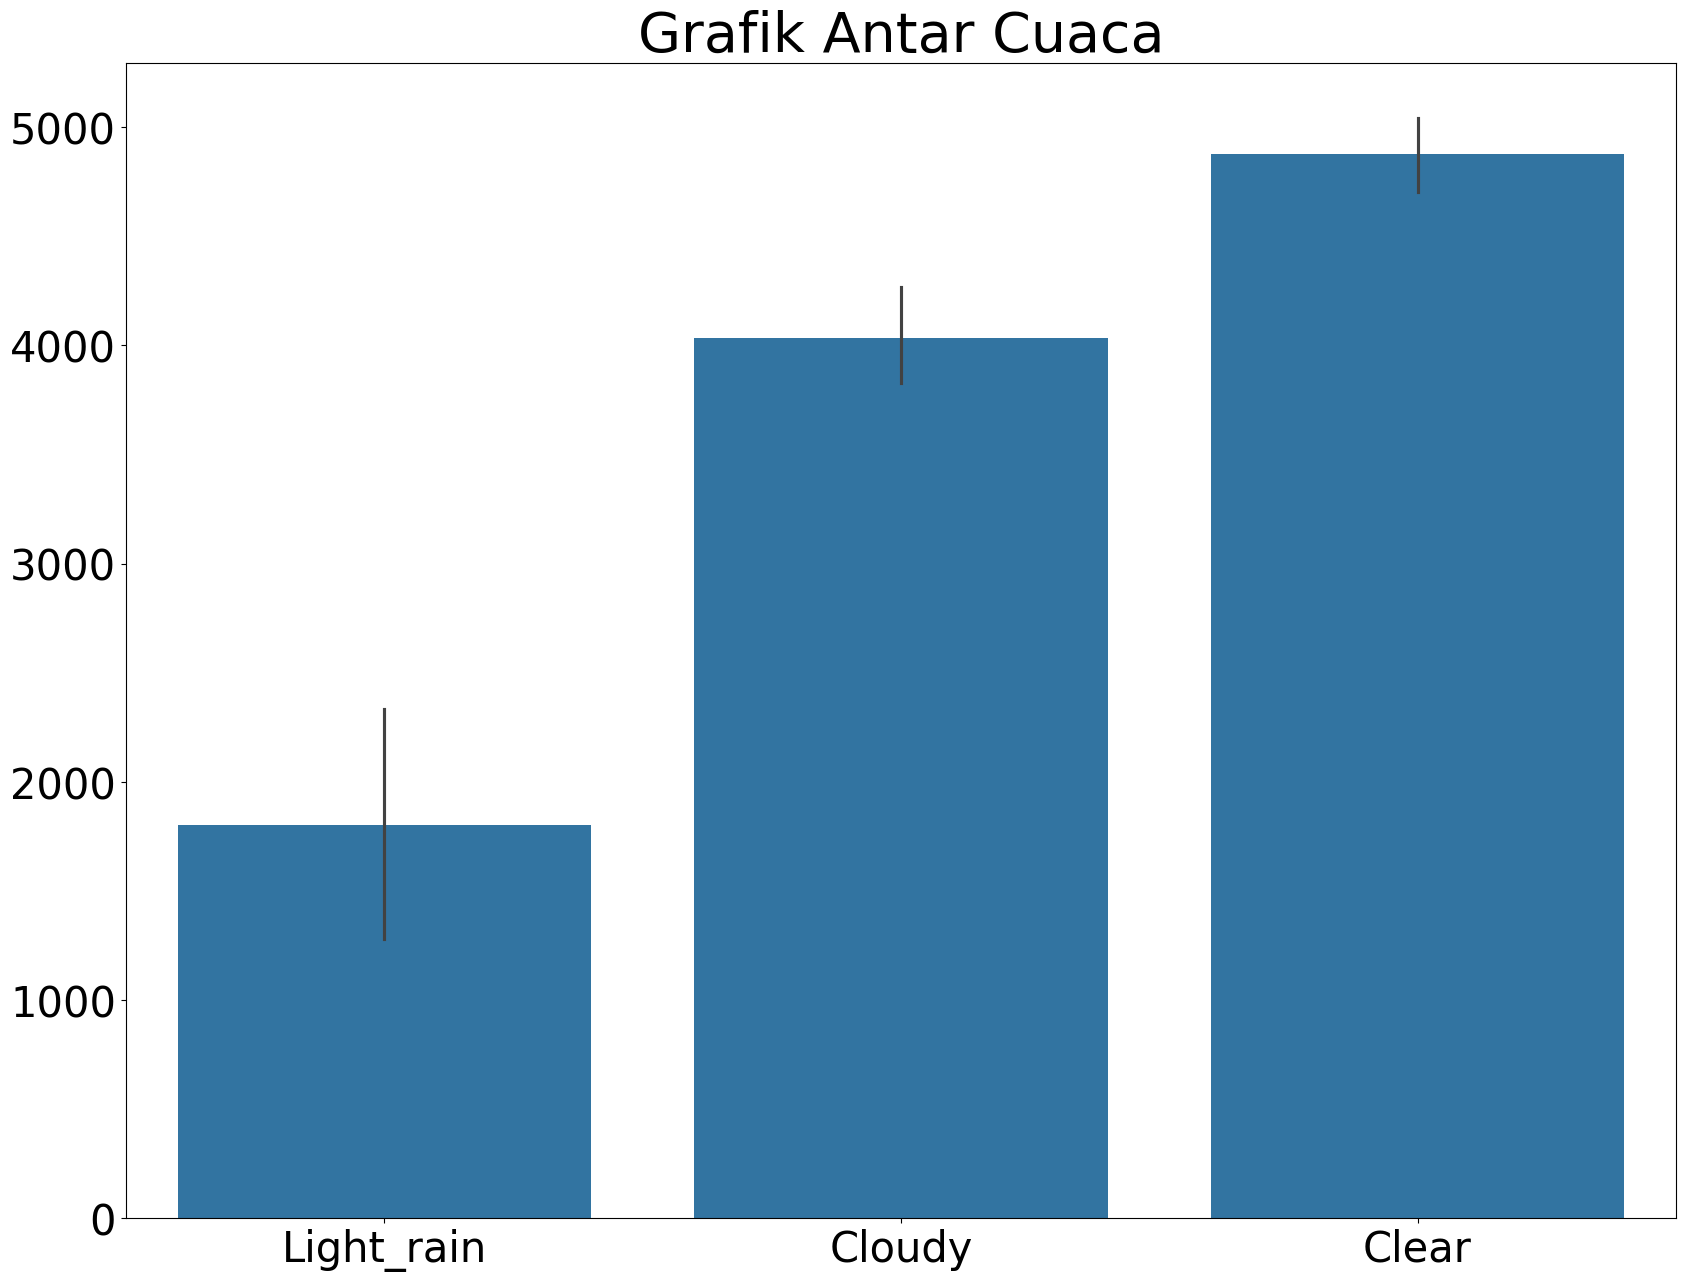

In [ ]:
# Mengatur warna
colors = ["#62C6DD", "#62C6DD", "#0C6bA1", "#62C6DD"]

# Membuat bar plot
plt.subplots(figsize=(20, 15))
sns.barplot(
    x="weather_situation",
    y="count_rental",
    data=day_df.sort_values(by="weather_situation", ascending=False),
)
plt.title("Grafik Antar Cuaca", loc="center", fontsize=40)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="x", labelsize=30)
plt.tick_params(axis="y", labelsize=30)

# Menampilkan plot
plt.show()

Cuaca yang paling banyak disewa adalah pada saat cuaca cerah (clear) dengan total penyewaan sebanyak 2.257.952

### Apa saja jenis pengguna sewa sepeda setiap harinya?

In [ ]:
# Menampilkan jumlah casual user
casual_user_sum = day_df.groupby(by="one_of_week").casual.sum().sort_values(ascending=False).reset_index()
casual_user_sum

# Menampilakan jumlah registered user
registered_user_sum = day_df.groupby(by="one_of_week").registered.sum().sort_values(ascending=False).reset_index()
registered_user_sum

# Menggabungkan pengguna casual dan registered
user = pd.merge(
    left=casual_user_sum,
    right=registered_user_sum,
    how="left",
    left_on="one_of_week",
    right_on="one_of_week"
)
user

# Melakukan melt untuk mempermudah mengolah data
user_type = user.melt(id_vars="one_of_week", var_name="user_type", value_name="user_count")
user_type

,one_of_week,casual,registered
0,Sat,153852,323955
1,Sun,140521,303506
2,Fri,78238,409552
3,Mon,70784,384719
4,Thu,61460,423935
5,Tue,57843,411266
6,Wed,57319,415729


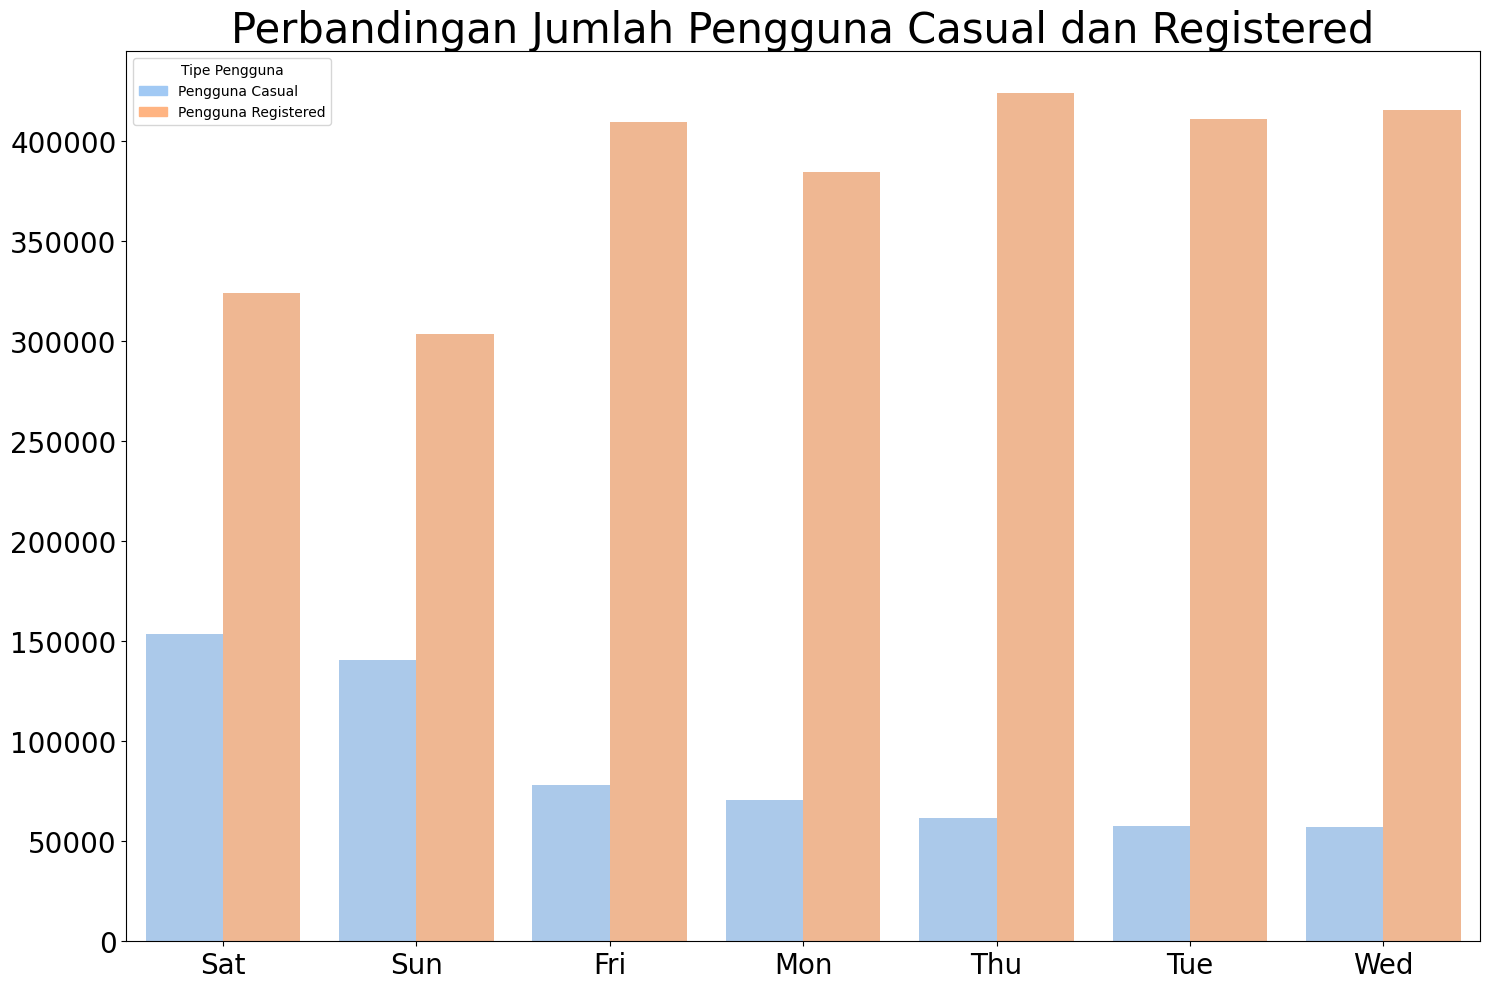

In [ ]:
# Membuat bar plot
plt.subplots(figsize=(15, 10))
sns.barplot(
    x="one_of_week",
    y="user_count",
    hue="user_type",
    data=user_type,
    palette="pastel"
)
plt.title("Perbandingan Jumlah Pengguna Casual dan Registered", loc="center", fontsize=30)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)

# Membuat legenda
casual_patch = mpatches.Patch(color=sns.color_palette("pastel")[0], label="Pengguna Casual")
registered_patch = mpatches.Patch(color=sns.color_palette("pastel")[1], label="Pengguna Registered")
plt.legend(handles=[casual_patch, registered_patch], title="Tipe Pengguna")

# Menampilkan plot
plt.tight_layout() # Mengatur tata letak agar lebih rapi
plt.show()

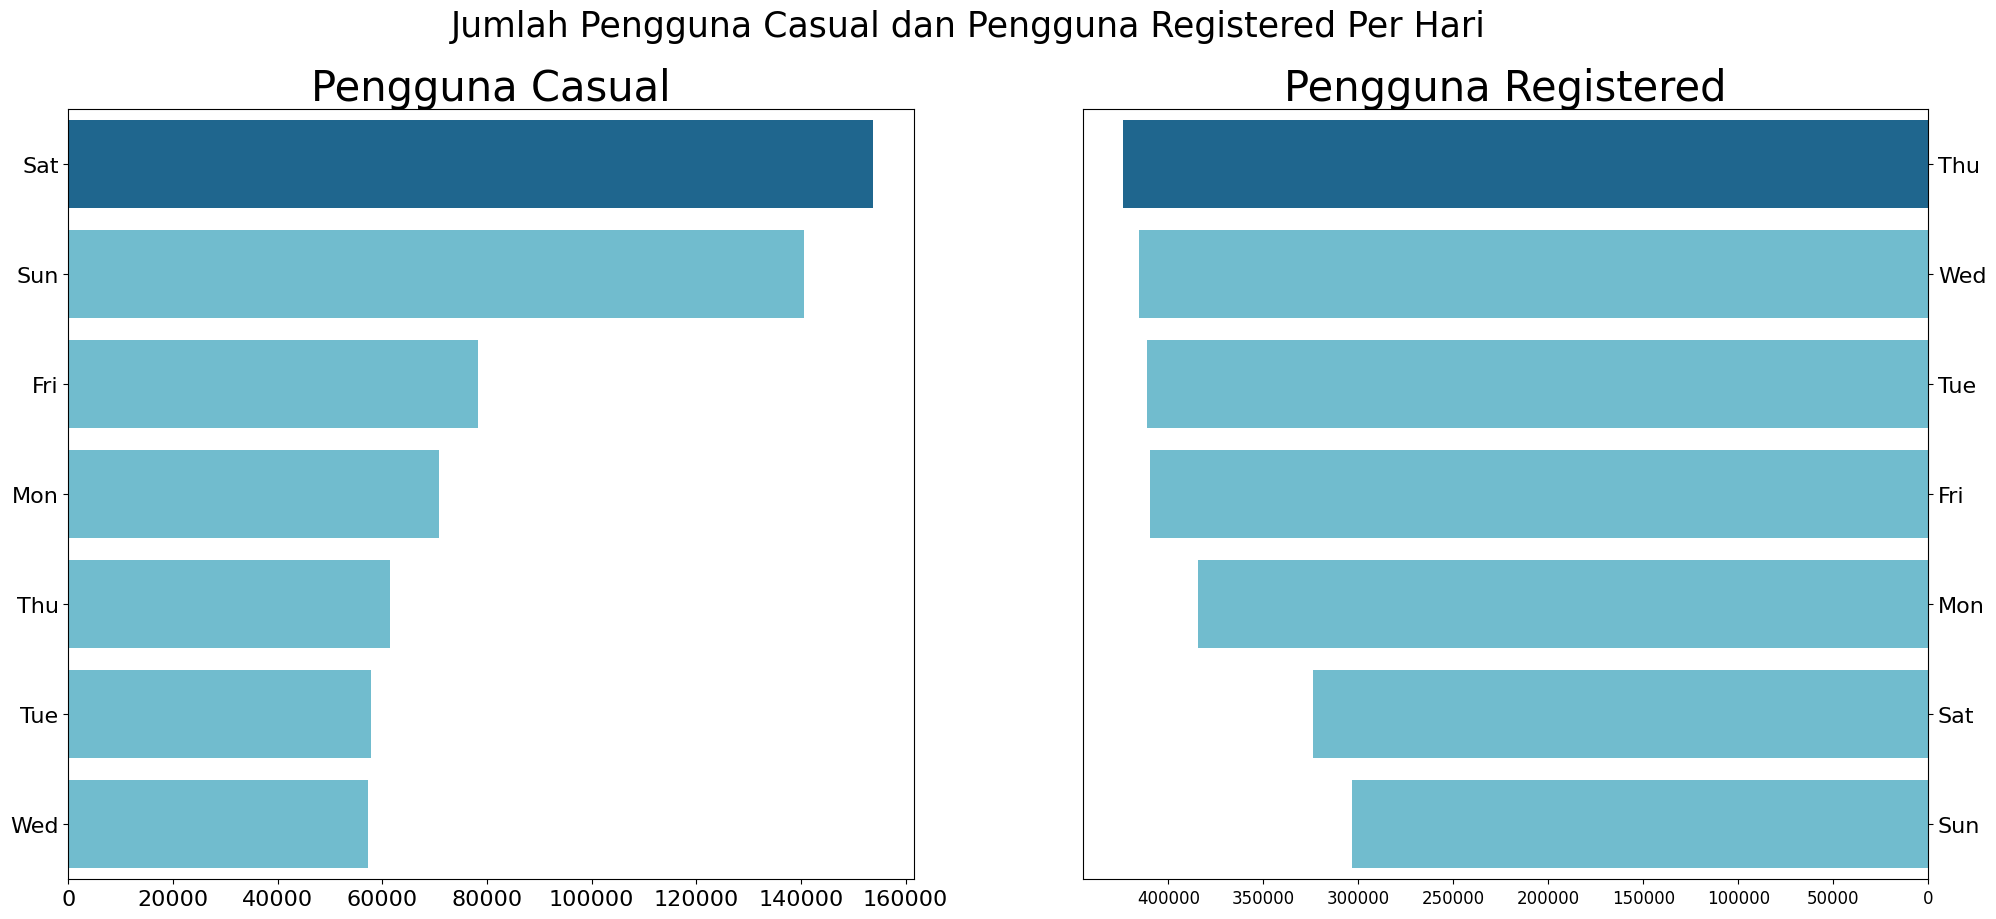

In [ ]:
# Menampilkan bar chart dari masing-masing user secara jelas

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))
colors = ["#0C6bA1", "#62C6DD", "#62C6DD", "#62C6DD", "#62C6DD", "#62C6DD", "#62C6DD"]

# Membuat barplot untuk jumlah pengguna casual per hari
sns.barplot(
    x="casual",
    y="one_of_week",
    data=casual_user_sum,
    palette=colors,
    hue="one_of_week",
    legend=False,
    ax=ax[0]
)

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Pengguna Casual", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=16)
ax[0].tick_params(axis='x', labelsize=16)

# Membuat barplot untuk jumlah pengguna registered per hari
sns.barplot(
    x="registered",
    y="one_of_week",
    data=registered_user_sum,
    palette=colors,
    hue="one_of_week",
    legend=False,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()

# Menyusun posisi label sumbu y
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

ax[1].set_title("Pengguna Registered", loc="center", fontsize=30)
ax[1].tick_params(axis='y', labelsize=16)
ax[1].tick_params(axis='x', labelsize=12)

# Menampilkan plot
plt.suptitle("Jumlah Pengguna Casual dan Pengguna Registered Per Hari", fontsize=25)
plt.show()


Berdasarkan dari hasil diatas, dapat dilihat bahwa penyewaan sepeda dengan tipe pengguna registered memiliki jumlah yang lebih banyak daripada pengguna casual.

Jumlah pengguna casual melakukan penyewaan sepeda terjadi pada hari Sabtu sebanyak 153.852 orang sedangkan pengguna registered melakukan penyewaan sepeda terjadi pada hari Kamis sebanyak 323.955 orang.

Bagaimana performa dari penjualan perusahaan dalam beberapa tahun terakhir?

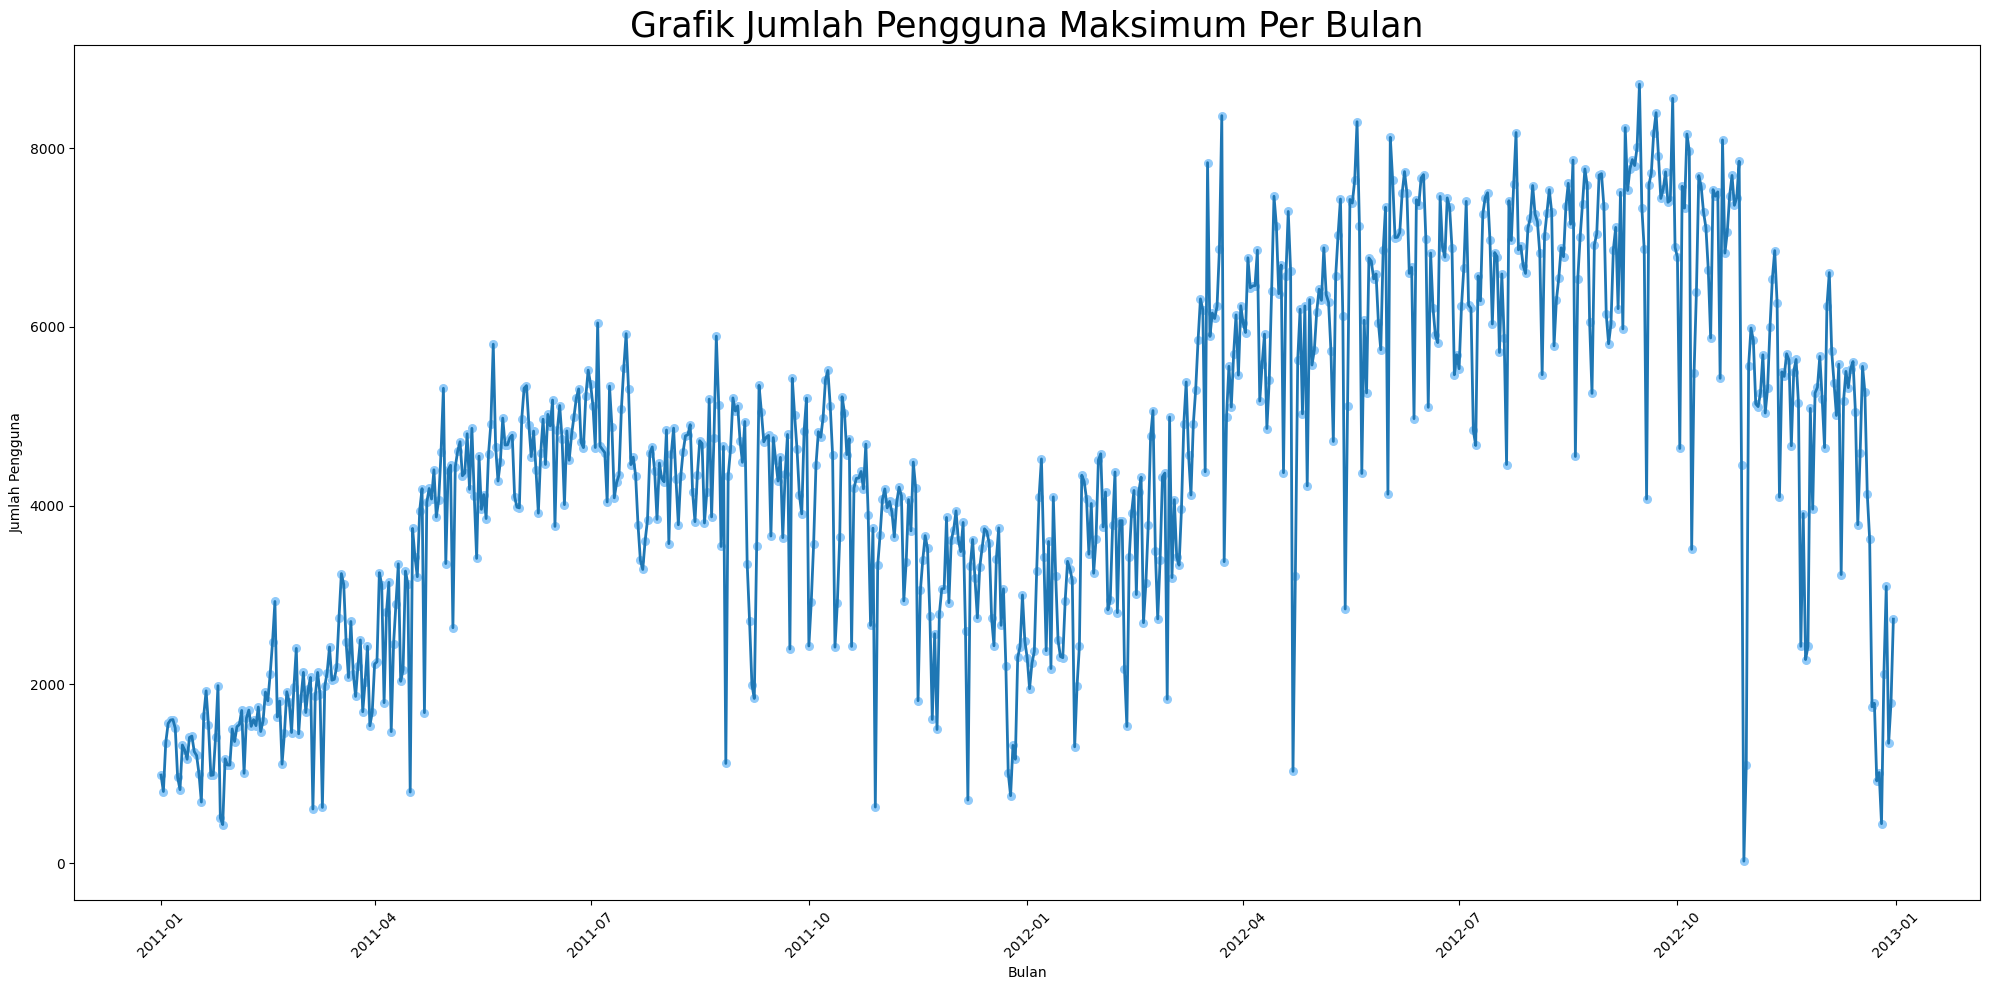

In [ ]:
plt.figure(figsize=(20,10))

monthly_count = day_df["count_rental"].groupby(day_df["dteday"]).max()
monthly_count.index = pd.to_datetime(monthly_count.index)

plt.scatter(
    monthly_count.index,
    monthly_count.values,
    c="#90CAF9",
    s=30,
    marker='o',
)

plt.plot(
    monthly_count.index,
    monthly_count.values,
    linewidth=2,
)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna")
plt.title("Grafik Jumlah Pengguna Maksimum Per Bulan", fontsize=25)

# Menampilkan plot
plt.xticks(rotation=45) # Memutar label sumbu x
plt.tight_layout() # Menyesuaikan layout agar tidak ada yg terpotong
plt.show()

Berdasarkan dari hasil diatas dapat dilihat bahwa jumlah pelanggan terbanyak terjadi pada bulan September, sebelum terjadi kenaikan hingga puncak ini terdapat kenaikan jumlah pelanggan yang cukup signifikan terjadi pada tahun 2011 hingga pertengahan tahun 2012. Selain itu, dapat dilihat bahwa adanya penurunan yang cukup signifikan pada bulan November hingga Desember

## Conclusion

Pertanyaan:
1. Bagaimana pengaruh cuaca terhadap penyewaan sepeda?
2. Apa saja jenis pengguna sewa sepeda setiap harinya?
3. Bagaimana performa dari penjualan perusahaan dalam beberapa tahun terakhir?



*   Conclusion 1: Cuaca yang paling banyak disewa adalah pada saat cuaca cerah (clear) dengan total penyewaan sebanyak 2.257.952
*   Conclusion 2: Berdasarkan dari hasil diatas, dapat dilihat bahwa penyewaan sepeda dengan tipe pengguna registered memiliki jumlah yang lebih banyak daripada pengguna casual.
Jumlah pengguna casual melakukan penyewaan sepeda terjadi pada hari Sabtu sebanyak 153.852 orang sedangkan pengguna registered melakukan penyewaan sepeda terjadi pada hari Kamis sebanyak 323.955 orang.
*   Conclusion 3: Berdasarkan dari hasil diatas dapat dilihat bahwa jumlah pelanggan terbanyak terjadi pada bulan September, sebelum terjadi kenaikan hingga puncak ini terdapat kenaikan jumlah pelanggan yang cukup signifikan terjadi pada tahun 2011 hingga pertengahan tahun 2012. Selain itu, dapat dilihat bahwa adanya penurunan yang cukup signifikan pada bulan November hingga Desember






## Analisis Lanjutan

RFM Anlaysis
1. Recency: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan
pembelian.
2. Frequency: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
3. Monetary: Menghitung total pengeluaran pelanggan dalam periode tersebut.



In [ ]:
rfm_df = day_df.groupby(by="one_of_week", as_index=False).agg({
        "dteday" : "max",
        "instant" : "count",
        "count_rental" : "sum"
})
rfm_df.columns = ["one_of_week", "max_order_timestamp", "frequency", "monetary"]
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

print(rfm_df.head())

  one_of_week  frequency  monetary  recency
0         Fri        104    487790        3
1         Mon        105    455503        0
2         Sat        105    477807        2
3         Sun        105    444027        1
4         Thu        104    485395        4
